# Intro
In this notebook, you will learn:
- what is clustering?
- what is k-Means?
- an approach to cluster time series by extracting features
- describing clusters

# Load Data

We are using a dataset that contains artificial time series of different shapes, e.g.
- upward trend
- downward trend
- upward shift
- downward shift
- cyclic
- random

The data is labeled, but we will not use the labels to train a clustering.

Normally, you would not use a clustering algorithm for labeled data, but in this training situation it is nice that we can compare the cluster model to the actual labels.

In [2]:
# import relevant packages

import xlrd
import tsfresh
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import the data
data = pd.read_excel("./data/synthetic time series dataset.xlsx", header=None)

# make a label dataframe

y = pd.DataFrame(list(range(600)))
y.columns = ["id"]
y["label"] = ['Normal' if x < 100 else 'Cyclic' if x < 200 else 'Increasing Trend' if x < 300 else 'Decreasing Trend' if x < 400 else 'Upward Shift' if x < 500 else 'Downward Shift' for x in y["id"]]
dict = {'Normal':1, 'Cyclic':2, 'Increasing Trend':3, 'Decreasing Trend':4, 'Upward Shift':5, 'Downward Shift':6}
y["label_integer"] = y["label"].map(dict)


data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
115,30.7568,30.4465,35.8128,42.8655,38.2801,43.9991,37.3190,28.0925,30.2355,28.6748,...,35.47020,41.23830,26.80200,24.40470,20.52640,26.218200,13.33870,21.582700,20.85500,23.96700
525,33.3017,28.7812,27.3310,26.5088,32.6660,32.5911,27.6087,34.5748,30.2097,33.9803,...,8.44844,15.39150,18.18200,10.90840,12.10740,8.040450,10.10640,14.800600,8.53106,8.78371
92,34.0622,35.2072,35.4672,36.0033,35.3541,25.7245,25.2015,24.6581,32.9260,29.4260,...,34.86490,35.94490,24.48580,33.07800,25.40200,33.511000,26.04030,27.446000,27.65090,27.11290
312,32.9877,30.0992,32.9225,30.8276,30.0797,31.8821,22.9249,29.6492,20.6227,20.4590,...,8.50924,10.66490,4.96722,3.10220,9.93147,10.972300,2.64308,0.184262,5.20902,1.26847
527,35.2219,27.0711,28.0901,26.0436,26.4435,32.5371,28.1613,30.5909,28.5282,33.4629,...,15.63000,20.64580,21.54590,21.62080,11.63210,21.060100,17.36840,11.583200,11.05300,12.99370
23,32.2613,27.3329,30.6940,27.3329,33.7185,30.3973,32.7784,30.8898,31.1498,33.5620,...,33.30200,34.08240,35.84030,35.41910,24.82110,29.961400,34.54100,26.366700,24.01320,27.93440
545,33.6013,34.0100,24.8024,32.3660,27.3766,26.4148,31.7494,30.1091,29.0919,28.7540,...,16.45240,20.99970,26.92840,18.06370,25.57010,19.226000,22.74910,25.845500,19.99500,20.26740
457,30.9214,30.4733,24.9228,30.6632,26.6403,27.6402,26.4196,28.7801,31.5449,30.0382,...,46.32100,51.98170,50.04350,45.64570,50.90430,48.305500,42.44100,41.456900,44.17650,42.16260
396,32.6914,29.2313,25.8049,24.9521,25.9552,24.0833,24.7563,30.0422,26.7933,27.4313,...,17.77690,20.23780,14.50130,10.08350,17.87390,17.283200,15.69340,16.022300,11.69040,12.44050
358,30.9772,24.9510,30.7112,26.6005,24.2642,26.4414,26.1082,22.9864,26.9700,25.8547,...,7.47589,6.13621,8.10335,9.53288,5.41335,0.528903,10.43570,9.571200,3.69343,6.59807


In [5]:
# plot function

def plot_df(data, y):
    fig = plt.figure(figsize=(6,30))
    col_count = data.shape[1]
    i = 1
    for row in data.iterrows():
        ax = fig.add_subplot(col_count,1,i)
        i += 1
        ax.plot(data.columns, row[1], label=y.loc[row[0],'label'])
        legend = ax.legend(loc='upper left', shadow=True, bbox_to_anchor=(1, 1))

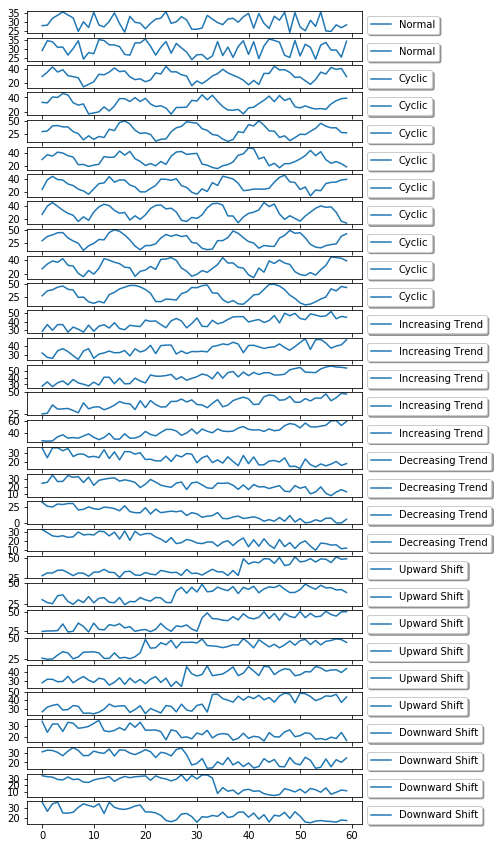

In [6]:
plot_df(data.sample(30).sort_index(), y)

## k-Means

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
km = KMeans(6) 
km.fit(data)
y["cluster"] = km.labels_ #array with labels for all clusters for every datapoint
km.labels_ 

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 0, 0, 5, 5, 5, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 5, 4, 5, 4, 4,
       0, 0, 4, 4, 5, 5, 0, 4, 5, 0, 4, 0, 5, 5, 4, 4, 4, 5, 4, 4, 5, 4,
       0, 4, 0, 0, 5, 4, 0, 0, 5, 5, 0, 4, 4, 0, 5, 5, 4, 4, 4, 4, 4, 0,
       4, 0, 0, 0, 5, 0, 5, 4, 0, 5, 5, 4, 0, 5, 4, 0, 4, 5, 0, 0, 5, 0,
       0, 4, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 1,

Cluster: 5


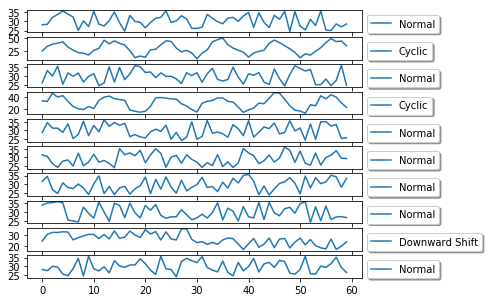

Cluster: 4


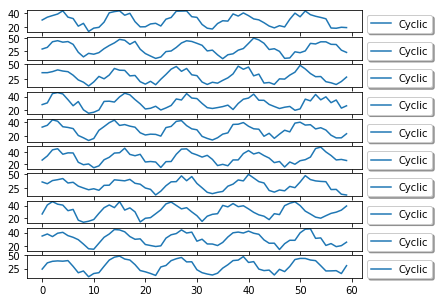

Cluster: 0


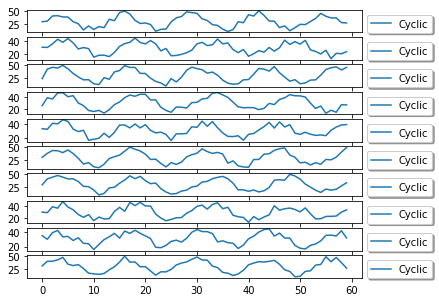

Cluster: 2


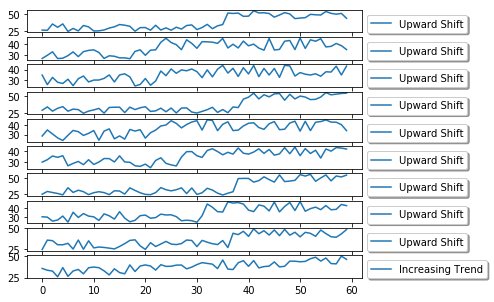

Cluster: 3


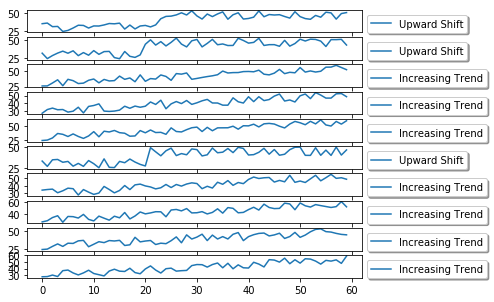

Cluster: 1


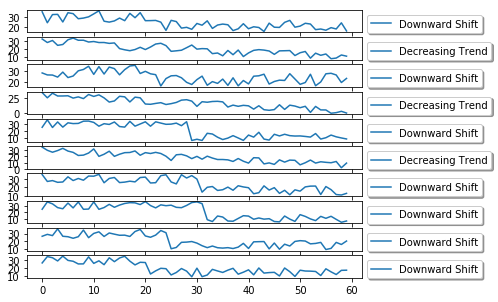

In [11]:
for cluster in y.cluster.unique():
    print('Cluster: %d'%cluster)
    cl_y = y[y.cluster == cluster]
    d = data.loc[cl_y.sample(10).index,:]
    plot_df(d, y)
    plt.show()

### Plot some examples of every cluster

Cluster: 2


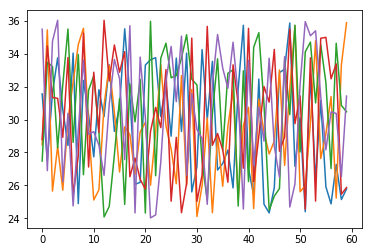

Cluster: 5


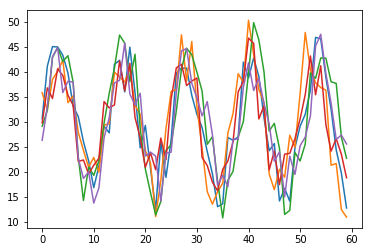

Cluster: 3


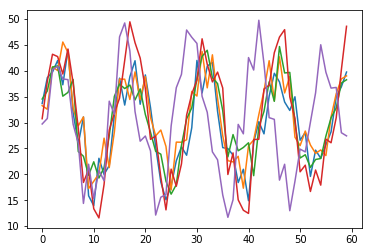

Cluster: 1


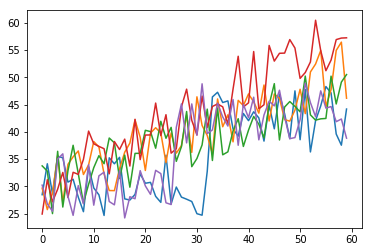

Cluster: 4


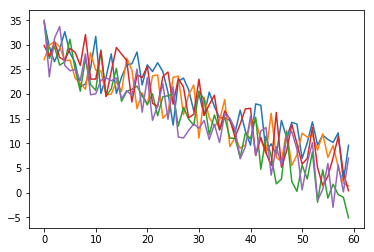

Cluster: 0


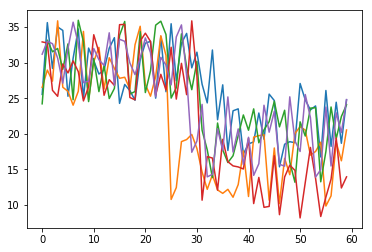

In [11]:
for i in y.cluster.unique():
    plt.figure()
    sample = y[y["cluster"] == i].sample(5)
    sample_ids = sample.id.values
    ts = data.loc[sample.index,:]
    print('Cluster: %d'%i)
    for row in ts.iterrows():
        plt.plot(ts.columns, row[1])
    plt.show()
        

### Show equivalent to confusion matrix

In [12]:
y["cluster"] = km.labels_
r = y[['label', 'cluster', 'id']].groupby(["label", "cluster"]).count()
r = r.reset_index(level=['label', 'cluster'])
r = r.pivot(index='label', columns='cluster', values='id')
r = r.fillna(0)
r

cluster,0,1,2,3,4,5
label,,,,,,
Cyclic,42.0,0.0,0.0,0.0,33.0,25.0
Decreasing Trend,0.0,100.0,0.0,0.0,0.0,0.0
Downward Shift,0.0,89.0,0.0,0.0,0.0,11.0
Increasing Trend,0.0,0.0,39.0,61.0,0.0,0.0
Normal,0.0,0.0,0.0,0.0,0.0,100.0
Upward Shift,0.0,0.0,79.0,21.0,0.0,0.0


# Feature Extraction
The above table shows that the clusters are far from our expectations -- in a perfect world, k-Means would rediscover the labels.

So, instead of analyzing the raw time series data, we will extract a bunch of features.

Features could be:
- minimum, maximum
- standard deviation
- energy
- fourier coefficient
- autocorrelation for different lags
- ...

If you extract features instead of using raw values, you have several advantages:
- usually less dimensions
- applicable to time series of different length (which would result in different amount of columns for each series)

Drawbacks:
- hard to find the right features
- might not represent all relevant information of the series

Here, we will use the `tsfresh` package to extract features. Namely, we use the function `extract_features`. If you have labeled data, you can also use `extract_relevant_features`, which includes a built-in feature selection (not applicable for unsupervised learning).

We will not explain all features generated by `tsfresh`. If interested, look up the documentation :)
Here will will focus on the clustering methods...

In [13]:
pd.options.display.max_rows=200
from tsfresh import extract_features
from tsfresh import extract_relevant_features

# put the data in the right format for the tsfresh package
df = data.transpose().unstack().reset_index()
df.columns = ["id", "timestamp", "value"]
df

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,id,timestamp,value
0,0,0,28.78120
1,0,1,34.46320
2,0,2,31.33810
3,0,3,31.28340
4,0,4,28.92070
5,0,5,33.75960
6,0,6,25.39690
7,0,7,27.78490
8,0,8,35.24790
9,0,9,27.11590


In [14]:
#extract features
extracted_features = extract_features(df, column_id="id", column_sort="timestamp")

# drop columns with missing values
extracted_features = extracted_features.dropna(how='any', axis=1)

#extract relevant features (extract_features + select_features at once)
# features_filtered_direct = extract_relevant_features(df, y["label_integer"], column_id='id', column_sort='timestamp')

Feature Extraction: 100%|██████████| 75/75 [00:33<00:00,  2.22it/s]


In [15]:
extracted_features.sample(5)

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""","value__agg_autocorrelation__f_agg_""median""","value__agg_autocorrelation__f_agg_""var""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-inf,value__value_count__value_0,value__value_count__value_1,value__value_count__value_inf,value__value_count__value_nan,value__variance,value__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
498,74892.877672,300.25620,-0.054131,-0.107015,0.118683,35.366186,0.906269,2.017366,0.470468,44.0089,...,738.951265,1682.192820,2236.998496,0.0,0.0,0.0,0.0,0.0,28.161307,1.0
248,110224.129542,228.30020,0.005964,0.110866,0.274770,37.847219,0.985046,4.031086,0.352537,52.3344,...,3136.678445,6902.636200,9916.852290,0.0,0.0,0.0,0.0,0.0,65.757886,1.0
508,36650.977907,254.37316,-0.092736,-0.002096,0.362665,38.340600,-0.814898,-3.352780,1.192351,35.6023,...,-713.314923,-1177.614597,-1482.398753,0.0,0.0,0.0,0.0,0.0,69.574346,1.0
30,54976.461576,289.87160,-0.018221,-0.004217,0.022608,35.513076,-0.347826,-0.051597,0.069540,35.7933,...,-102.002361,119.876475,231.072028,0.0,0.0,0.0,0.0,0.0,13.423005,1.0
593,37366.678049,265.69860,-0.061223,0.011768,0.258922,38.852752,-0.817670,-3.458974,1.217661,35.9809,...,-561.723275,-1130.973615,-1686.822838,0.0,0.0,0.0,0.0,0.0,75.063517,1.0


In [16]:
km = KMeans(6)
km.fit(extracted_features)
y["cluster"] = km.labels_
y[['label', 'cluster', 'id']].groupby(["label", "cluster"]).count()
y["cluster"] = km.labels_
r = y[['label', 'cluster', 'id']].groupby(["label", "cluster"]).count()
r = r.reset_index(level=['label', 'cluster'])
r = r.pivot(index='label', columns='cluster', values='id')
r = r.fillna(0)
r

cluster,0,1,2,3,4,5
label,,,,,,
Cyclic,0.0,0.0,100.0,0.0,0.0,0.0
Decreasing Trend,22.0,0.0,0.0,0.0,0.0,78.0
Downward Shift,81.0,0.0,0.0,0.0,0.0,19.0
Increasing Trend,0.0,34.0,0.0,30.0,36.0,0.0
Normal,0.0,0.0,100.0,0.0,0.0,0.0
Upward Shift,0.0,33.0,3.0,60.0,4.0,0.0


# Scaling
k-Means is a distance-based approach. If the features have different scale, then those with a higher scale contribute stronger to the clustering...

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

km = KMeans(6, random_state=42)
ss = StandardScaler()
pipe = make_pipeline(ss, km)
pipe.fit(extracted_features)
y["cluster"] = km.labels_
r = y[['label', 'cluster', 'id']].groupby(["label", "cluster"]).count()
r = r.reset_index(level=['label', 'cluster'])
r = r.pivot(index='label', columns='cluster', values='id')
r = r.fillna(0)
r

cluster,0,1,2,3,4,5
label,,,,,,
Cyclic,0.0,0.0,0.0,100.0,0.0,0.0
Decreasing Trend,100.0,0.0,0.0,0.0,0.0,0.0
Downward Shift,1.0,0.0,0.0,0.0,99.0,0.0
Increasing Trend,0.0,100.0,0.0,0.0,0.0,0.0
Normal,0.0,0.0,100.0,0.0,0.0,0.0
Upward Shift,0.0,5.0,0.0,0.0,0.0,95.0


# Cluster Performance and Parameter Selection
How to evaluate your clustering, if you don't have labels?

## Calisnki-Harabaz

- Sum of distances of cluster centroids to data centroid 
- / by sum of distances of data points to cluster centroid (weighted by cluster size)
- \* number of datapoints - k

**Bigger is better!**

Math (from Wikipedia):

For $k$ clusters, the Calinski-Harabaz score $s$ is given as the
ratio of the between-clusters dispersion mean and the within-cluster
dispersion:

$s(k) = \frac{\mathrm{Tr}(B_k)}{\mathrm{Tr}(W_k)} \times \frac{N - k}{k - 1}$

where $B_K$ is the between group dispersion matrix and $W_K$
is the within-cluster dispersion matrix defined by:

$W_k = \sum_{q=1}^k \sum_{x \in C_q} (x - c_q) (x - c_q)^T$

$B_k = \sum_q n_q (c_q - c) (c_q - c)^T$

with $N$ the number of points in our data, $C_q$be the set of
points in cluster :math:`q`, $_q$be the center of cluster
$q$, $c$ be the center of $E$, $_q$ be the number of
points in cluster $q$.

## Implementation

You can use `sklearn.metrics.calinski_harabaz_score(X, predicted_cluster)`.

Input: `X` is your feature matrix (in our case, `extracted_features`), and labels is the labels attribute of your clustering, e.g., `km.labels_`.

## Exercise
- create a chart that plots the Calinski-Habaraz score for different values of `k`
- what do you think of the result?

In [70]:
from sklearn.metrics import calinski_harabaz_score

# Your code here...

score = list()
k_n = list()

for i in range(2,30):

    

    km = KMeans(i, random_state=42)
    ss = StandardScaler()
    
    scaled_data = ss.fit_transform(extracted_features)
    

      
    km.fit(scaled_data)

    
    score.append(calinski_harabaz_score(scaled_data, km.labels_))
    k_n.append(i)



In [60]:
print(ss.transform)

<bound method StandardScaler.transform of StandardScaler(copy=True, with_mean=True, with_std=True)>

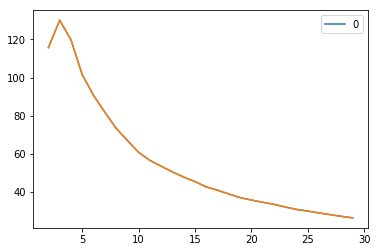

In [71]:

df = pd.DataFrame(score)
df.index = k_n
df.plot()


plt.plot(df.index,score)


In [69]:
df

,0
2,115.717679
3,130.026883
4,119.799322
5,101.513323
6,90.710388
7,81.894195
8,73.475883
9,67.099287
10,60.853318
11,56.609510


In [29]:
extracted_features.describe()

variable,value__abs_energy,value__absolute_sum_of_changes,"value__agg_autocorrelation__f_agg_""mean""","value__agg_autocorrelation__f_agg_""median""","value__agg_autocorrelation__f_agg_""var""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","value__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","value__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,value__time_reversal_asymmetry_statistic__lag_1,value__time_reversal_asymmetry_statistic__lag_2,value__time_reversal_asymmetry_statistic__lag_3,value__value_count__value_-inf,value__value_count__value_0,value__value_count__value_1,value__value_count__value_inf,value__value_count__value_nan,value__variance,value__variance_larger_than_standard_deviation
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.0,600.0,600.0,600.0,600.0,600.000000,600.0
mean,60913.674209,253.305422,-0.029178,-0.020004,0.230675,36.910668,-0.017663,-0.025194,0.561570,42.040585,...,440.010165,741.864685,1093.845583,0.0,0.0,0.0,0.0,0.0,53.810618,1.0
std,27211.566663,40.299987,0.037553,0.084289,0.119648,3.888159,0.790403,2.880681,0.382435,7.533021,...,1187.814529,2420.596959,3660.737205,0.0,0.0,0.0,0.0,0.0,30.582042,0.0
min,17901.228538,152.228300,-0.117179,-0.315894,0.014169,30.192967,-0.999053,-5.298397,0.043722,30.539000,...,-1089.519850,-2747.300308,-4163.949076,0.0,0.0,0.0,0.0,0.0,8.532906,1.0
25%,36915.594837,226.252280,-0.059198,-0.069657,0.154095,34.402744,-0.868279,-2.601914,0.244875,35.643300,...,-498.167114,-1083.725592,-1652.314393,0.0,0.0,0.0,0.0,0.0,29.993541,1.0
50%,57125.994622,245.895100,-0.020627,-0.014175,0.256083,35.882512,-0.067397,-0.036224,0.439127,39.287250,...,-35.953510,-218.161351,-271.996886,0.0,0.0,0.0,0.0,0.0,52.829887,1.0
75%,82068.666506,268.227240,0.000439,0.037217,0.328124,37.837812,0.863654,2.605232,0.831658,48.428275,...,1241.136652,2428.719345,3809.501127,0.0,0.0,0.0,0.0,0.0,75.408701,1.0
max,127522.617812,398.117600,0.054616,0.180458,0.465826,49.473624,0.999278,5.306900,1.676582,58.600100,...,4231.983524,8790.022941,13101.213964,0.0,0.0,0.0,0.0,0.0,151.929548,1.0


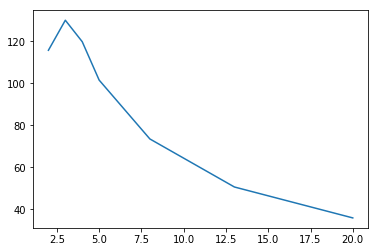

In [30]:
#
#
#
# Solution below....
#
#
#
#    ###
#    ###
#    ###
#   #####
#    ###
#     #
#
#
#        ###
#        ###
#        ###
#       #####
#        ###
#         #
#
#
#
#    ###
#    ###
#    ###
#   #####
#    ###
#     #
#
#
#        ###
#        ###
#        ###
#       #####
#        ###
#         #
#
#
#
#    ###
#    ###
#    ###
#   #####
#    ###
#     #
#
#
#        ###
#        ###
#        ###
#       #####
#        ###
#         #
#
#
scores = {}
for k in [2,3,4,5,8,13,20]:
    km = KMeans(k, random_state=42)
    ss = StandardScaler()
    scaled = ss.fit_transform(extracted_features)
#     pipe = make_pipeline(ss, km)
    clusters = km.fit_predict(scaled)
    
    # we need to test on the scaled data, for the same reason why
    # we train on the scaled data: otherwise, features with a high
    # scale will dominate the CH score
    scores[k] = calinski_harabaz_score(scaled, clusters)

plt.plot(*zip(*scores.items()));

In [31]:
scores.items()

dict_items([(2, 115.7176788935887), (3, 130.02688329094204), (4, 119.79932231047492), (5, 101.51332338656097), (8, 73.47588342497801), (13, 50.587505998448705), (20, 35.85712448585885)])

# Investigating the relevant factors

Once you have found clusters, it is important to interpret them.

For k-Means, you could look at the cluster centroids to get an understanding.

In the general case, it would be possible to train a descriptive model using the clusters as label, to get an interpretation of the meaning of the clusters.

In [72]:
# import SVM
from sklearn import svm

km = KMeans(6)

# dataset for the SVM
X = ss.fit_transform(extracted_features)
km.fit(X)
y = km.labels_

# fit the model to the data
clf = svm.LinearSVC()
clf.fit(X, y)  

# select the most important features per cluster. "clf.coef_" gives the coefficients per attribute per cluster.
# I put the coefficients in a dataframe and rename the columns.
# every row is now a cluster, and every column is an attribute. And the values represent the coefficients (importance) of the attributes
df = pd.DataFrame(clf.coef_)
df

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.013643,-0.021994,0.082953,0.069046,0.033676,-0.043081,-0.021657,0.010252,-0.111855,0.016341,...,0.035622,0.034242,0.033072,0.0,0.0,0.0,0.0,0.0,0.042364,0.0
1,0.009291,0.014154,0.024085,-0.001572,-0.048035,0.008208,-0.002006,-0.006468,-0.047488,-0.016835,...,0.013518,0.015128,0.020863,0.0,0.0,0.0,0.0,0.0,0.036070,0.0
2,0.038662,-0.007778,0.071741,0.067388,0.006877,0.030741,0.019378,-0.006109,-0.062422,0.007578,...,0.062151,0.059602,0.064151,0.0,0.0,0.0,0.0,0.0,0.034054,0.0
3,-0.003806,0.007104,0.009414,0.008449,0.053823,0.058931,-0.002324,-0.003516,-0.005291,0.013174,...,-0.012210,-0.018675,-0.020555,0.0,0.0,0.0,0.0,0.0,0.024024,0.0
4,0.008574,0.031347,-0.088547,-0.031367,-0.020103,-0.075592,0.038566,0.054596,0.086238,0.027960,...,-0.038676,-0.029212,-0.022411,0.0,0.0,0.0,0.0,0.0,0.005259,0.0
5,-0.031819,0.004239,-0.089285,-0.073918,-0.054540,0.020708,-0.051576,-0.052005,0.182023,-0.060036,...,-0.009096,0.010348,0.001311,0.0,0.0,0.0,0.0,0.0,-0.006157,0.0


In [73]:
df.columns = extracted_features.columns
# select the column names where the max of every row occurs
# i.e. select the most important attribute per cluster.
# print(df.idxmax(axis=1))
# print(df.idxmin(axis=1))

for cluster, row in df.iterrows():
    print('Cluster: ', cluster)
    print('+++++++++++')
    print('Indicators:')
    print(row.nlargest(3))
    print('Counter-indicators:')
    print(row.nsmallest(3))
    print()

('Cluster: ', 0)
+++++++++++
Indicators:
variable
value__range_count__max_1__min_-1    0.123616
value__number_crossing_m__m_1        0.120994
value__ratio_beyond_r_sigma__r_2     0.096202
Name: 0, dtype: float64
Counter-indicators:
variable
value__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"   -0.111855
value__index_mass_quantile__q_0.9                                   -0.096914
value__ar_coefficient__k_10__coeff_1                                -0.086838
Name: 0, dtype: float64
()
('Cluster: ', 1)
+++++++++++
Indicators:
variable
value__linear_trend__attr_"pvalue"                                   0.113739
value__cid_ce__normalize_True                                        0.097827
value__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"    0.089979
Name: 1, dtype: float64
Counter-indicators:
variable
value__partial_autocorrelation__lag_1   -0.135273
value__autocorrelation__lag_1           -0.135273
value__autocorrelation__lag_2           -0.121462
Name: 1, dt

0
Cluster: 0


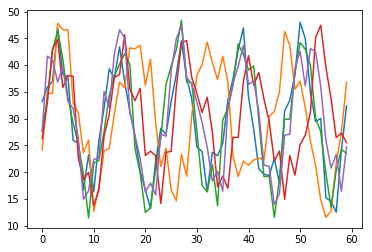

1
Cluster: 1


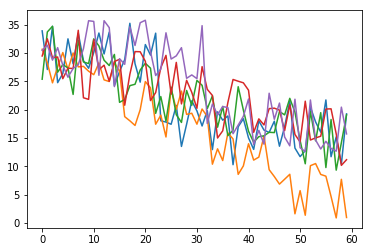

2
Cluster: 2


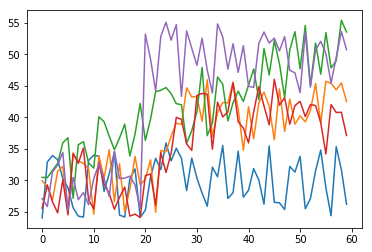

In [34]:
clustering = pd.Series(y)

for i in np.sort(clustering.unique()):
    plt.figure()
    print(i)
    sample = clustering[clustering == i].sample(5)
    sample_ids = sample.index
    ts = data.loc[sample.index,:]
    print('Cluster: %d'%i)
    for row in ts.iterrows():
        plt.plot(ts.columns, row[1])
    plt.show();